<IPython.core.display.Javascript object>


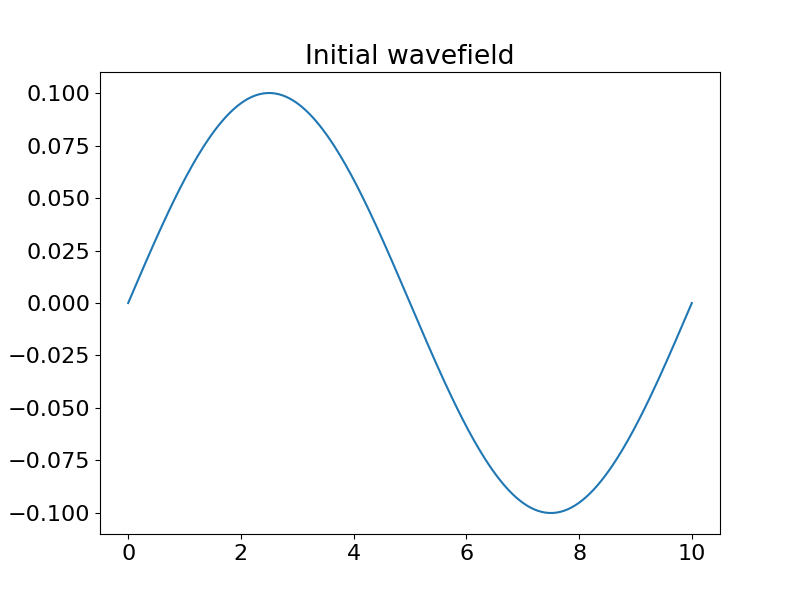

Operator `Kernel` run in 0.01 s
/home/ed/.local/lib/python3.6/site-packages/ipykernel/__main__.py:44: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


<IPython.core.display.Javascript object>


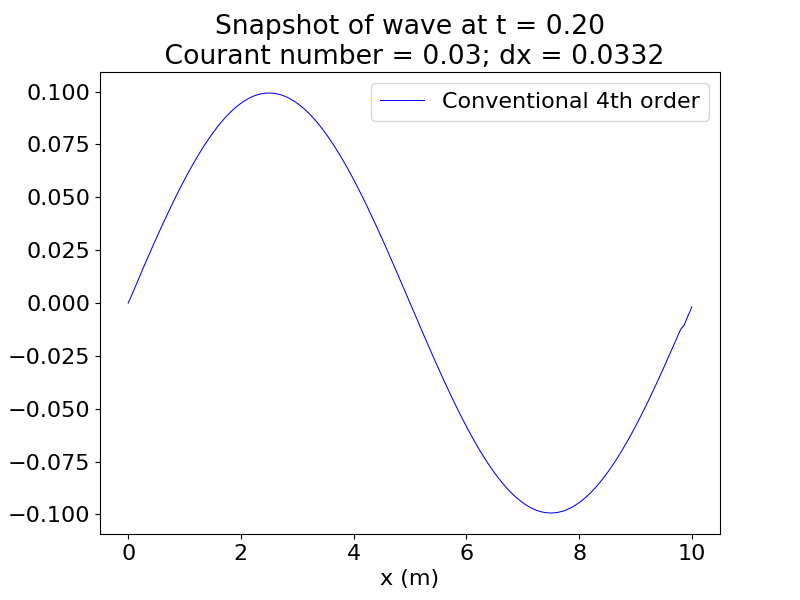

<IPython.core.display.Javascript object>


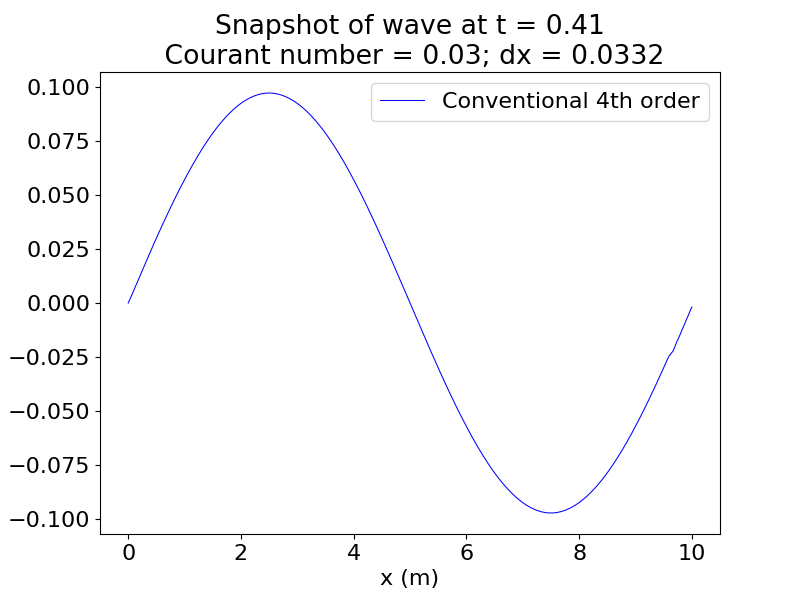

<IPython.core.display.Javascript object>


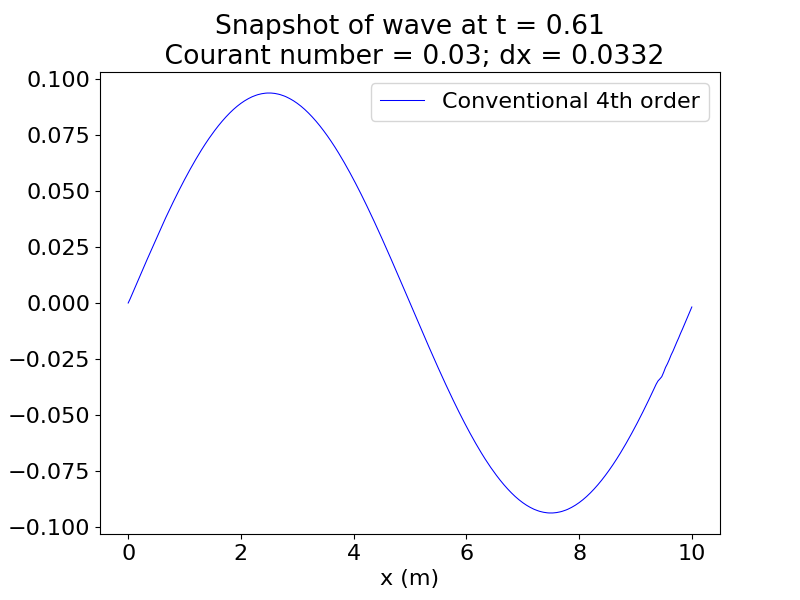

<IPython.core.display.Javascript object>


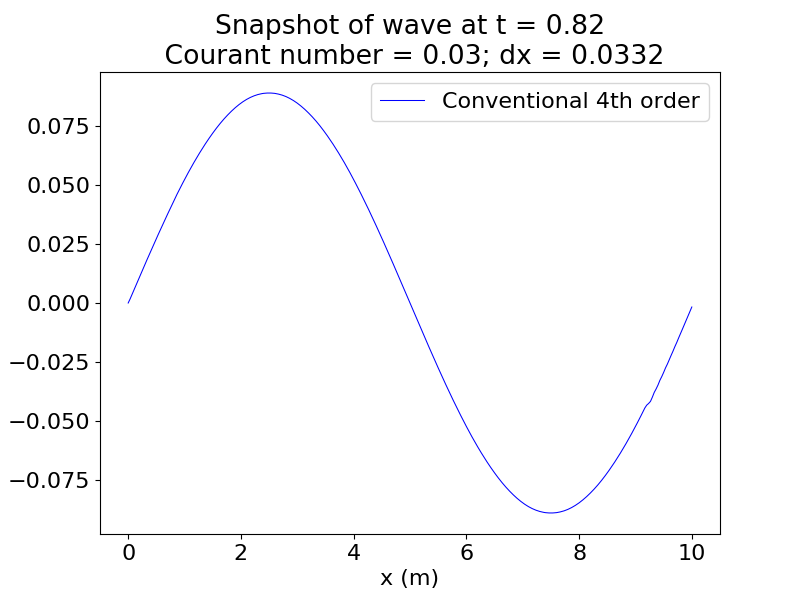

<IPython.core.display.Javascript object>


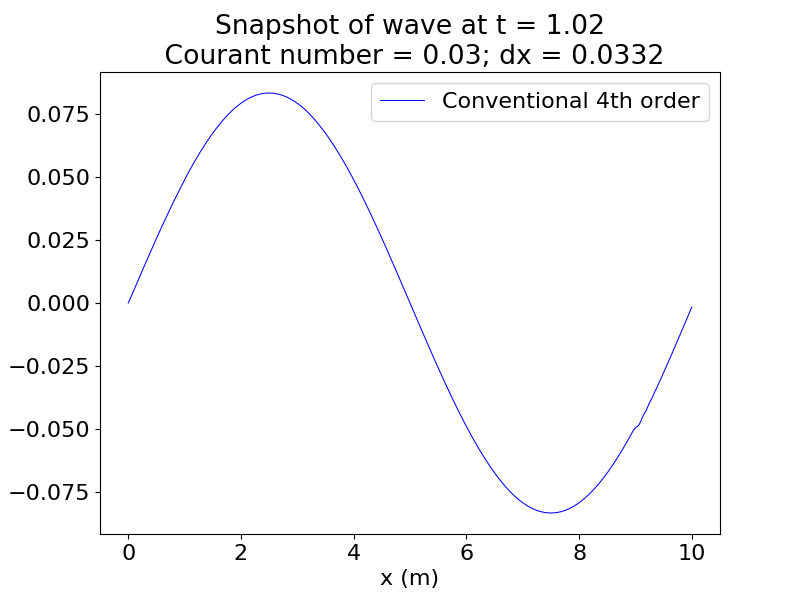

<IPython.core.display.Javascript object>


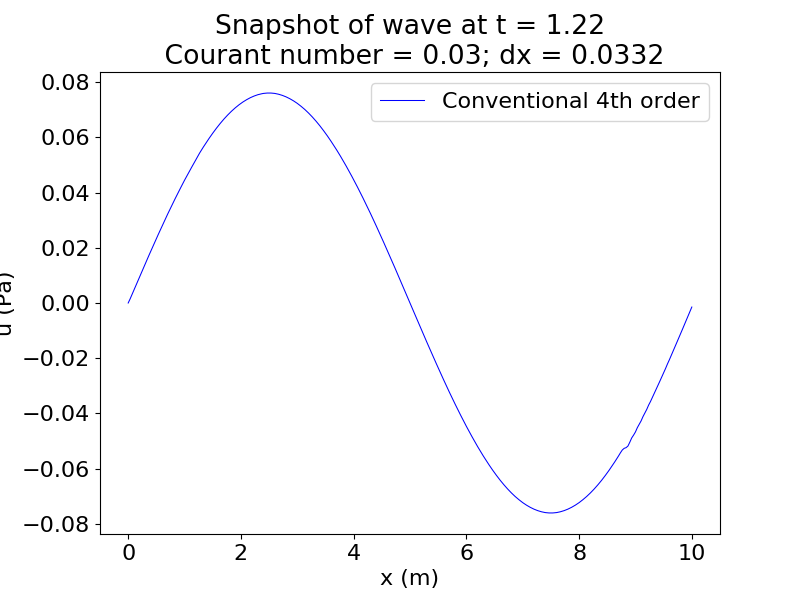

<IPython.core.display.Javascript object>


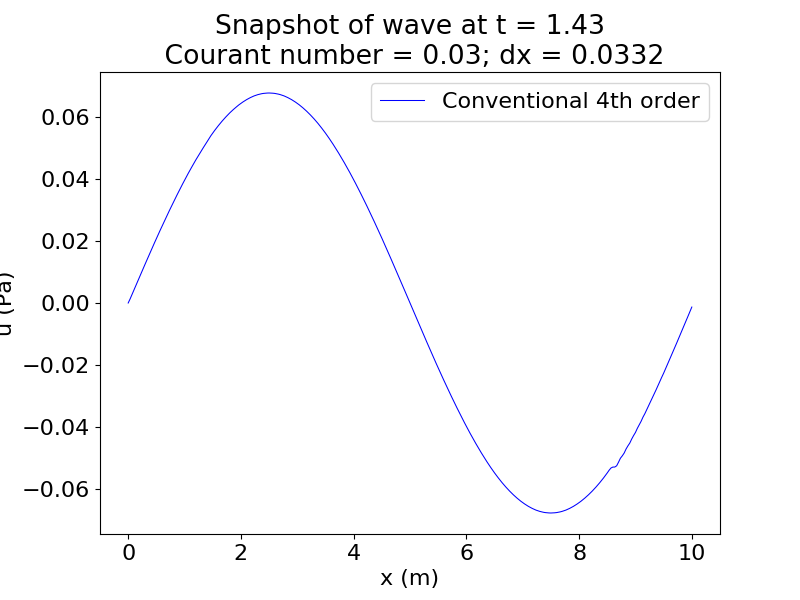

<IPython.core.display.Javascript object>


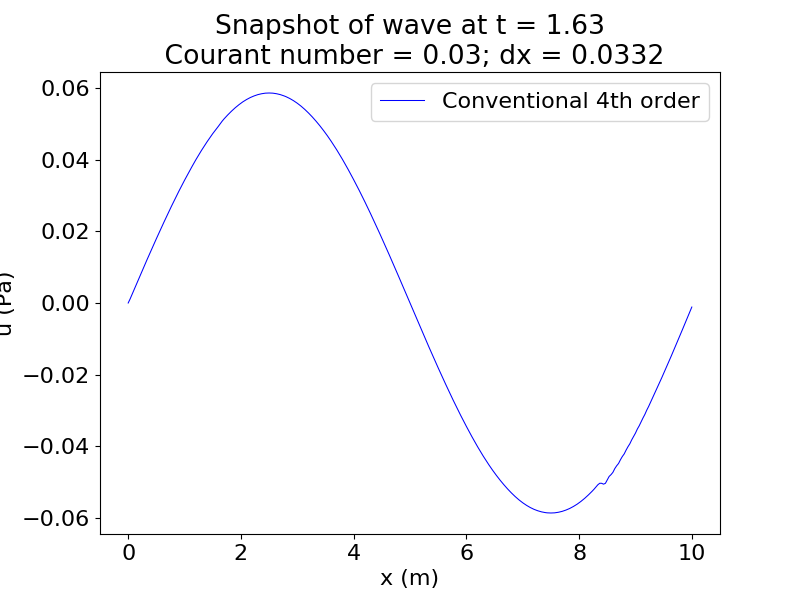

<IPython.core.display.Javascript object>


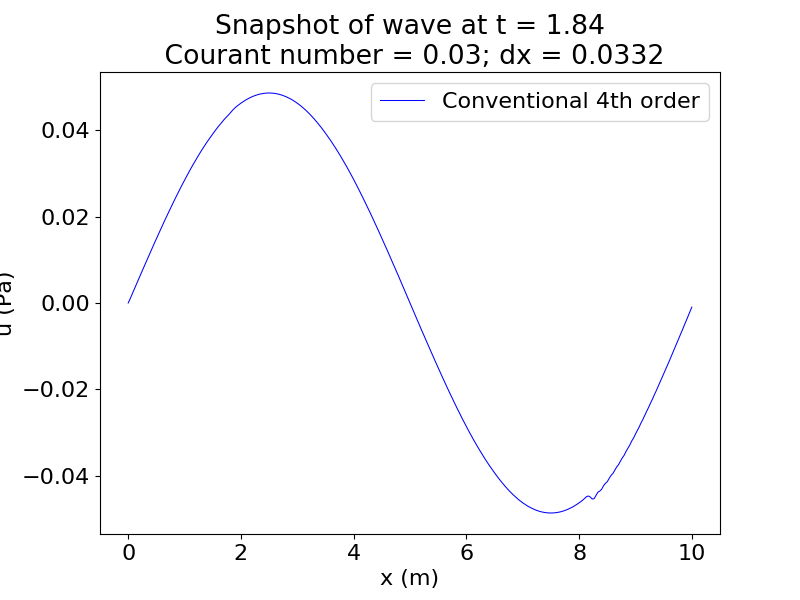

<IPython.core.display.Javascript object>


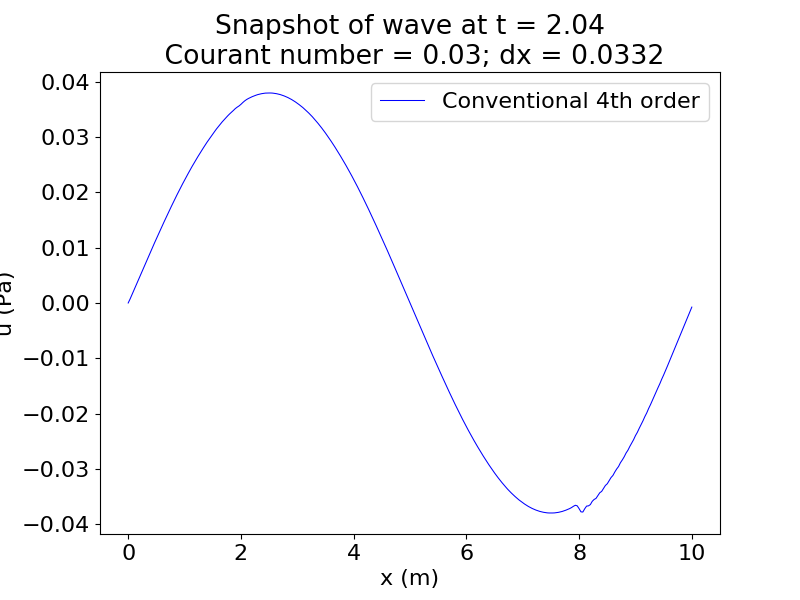

<IPython.core.display.Javascript object>


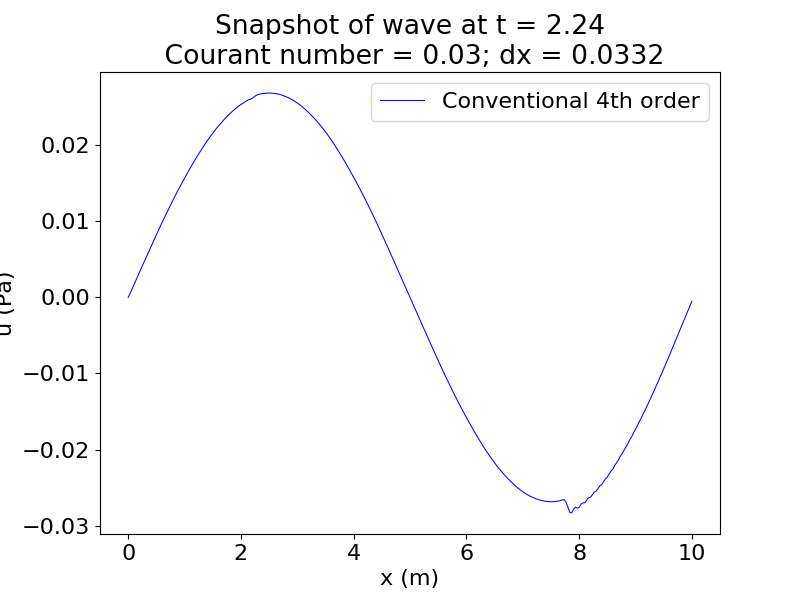

<IPython.core.display.Javascript object>


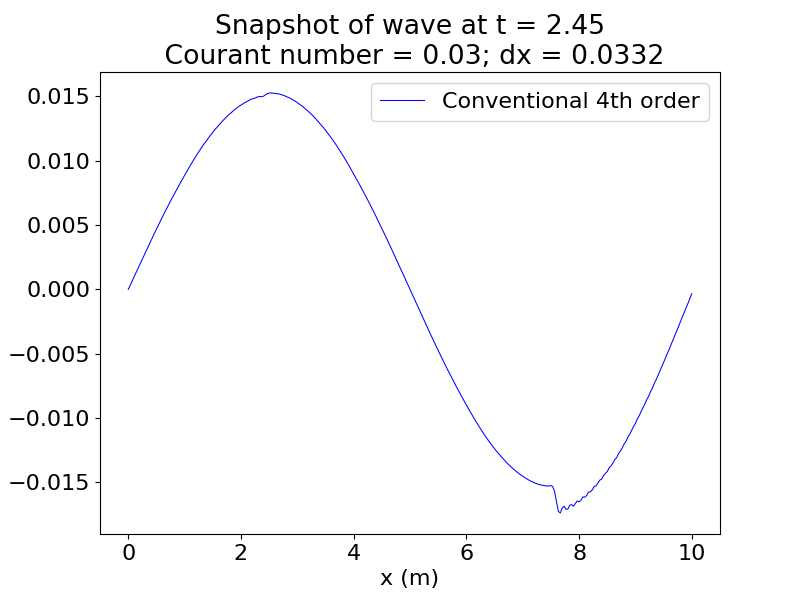

<IPython.core.display.Javascript object>


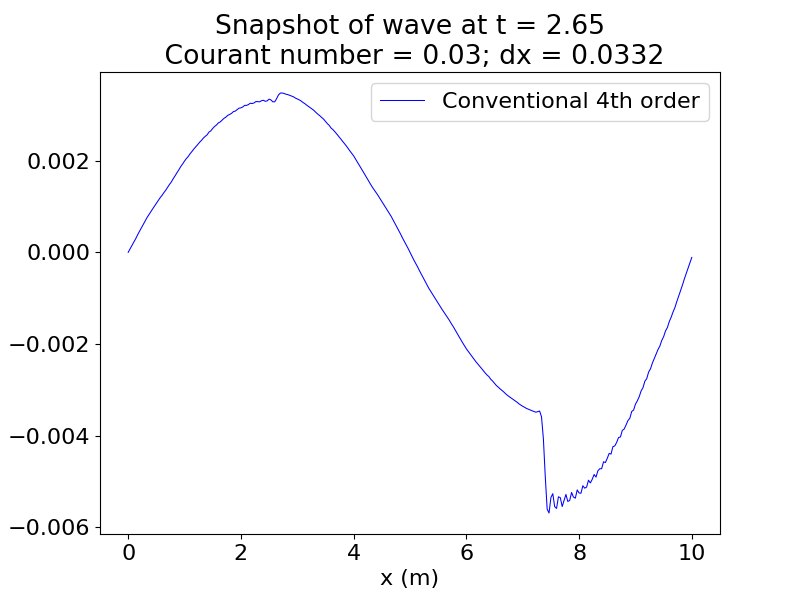

<IPython.core.display.Javascript object>


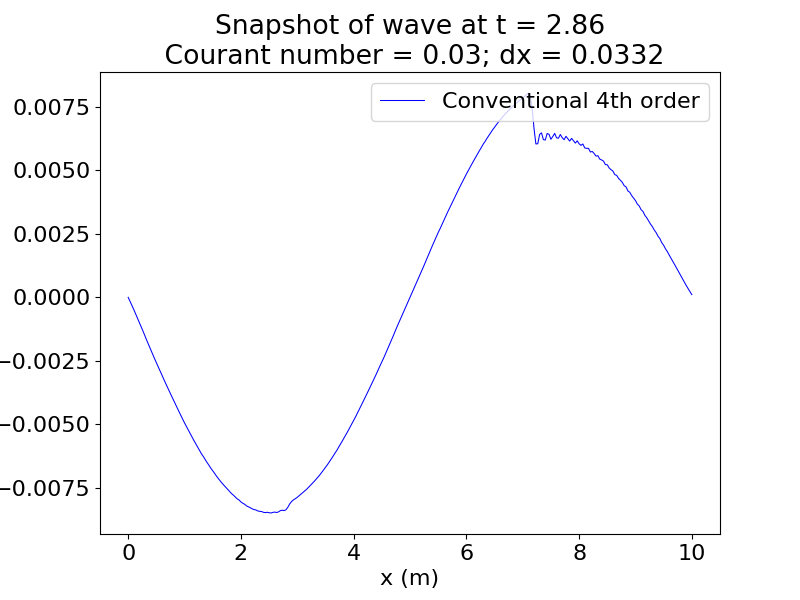

<IPython.core.display.Javascript object>


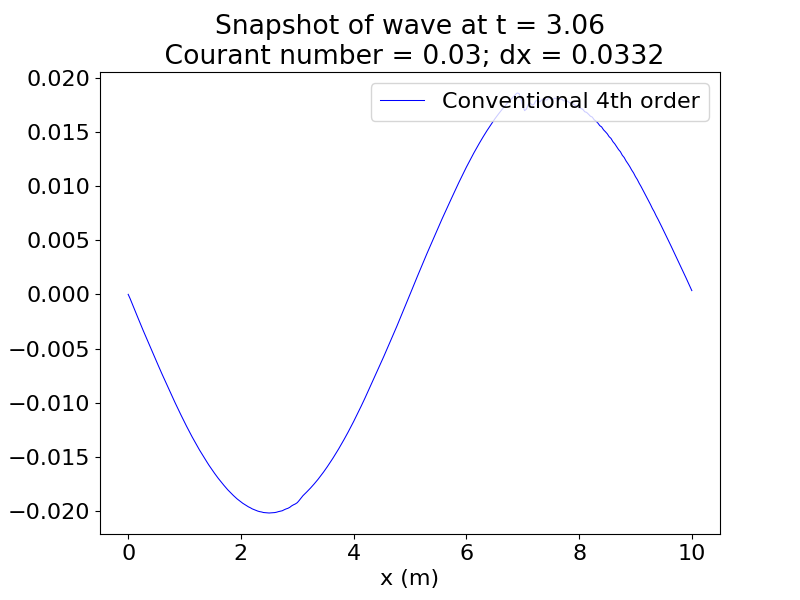

<IPython.core.display.Javascript object>


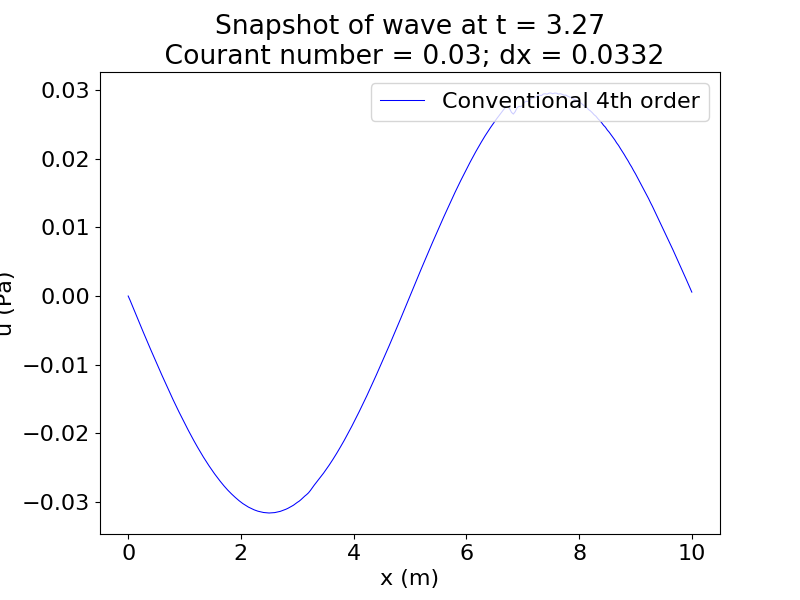

<IPython.core.display.Javascript object>


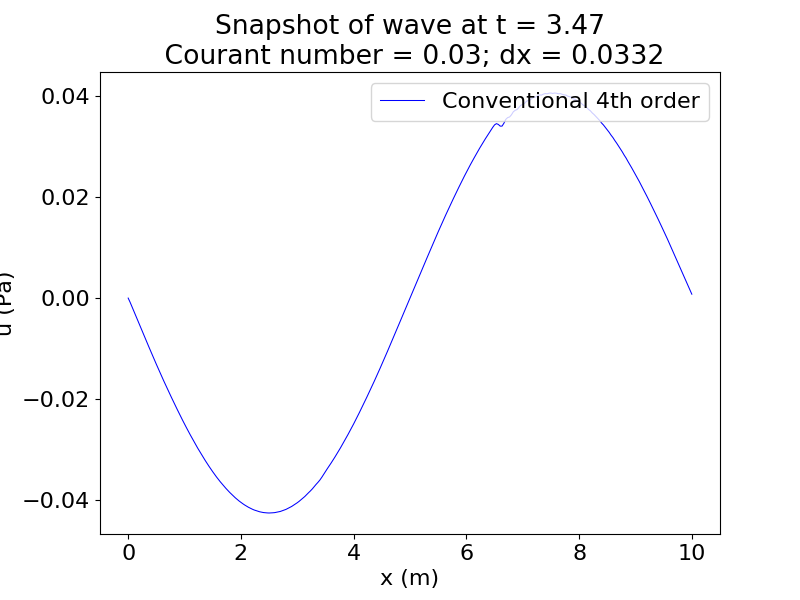

<IPython.core.display.Javascript object>


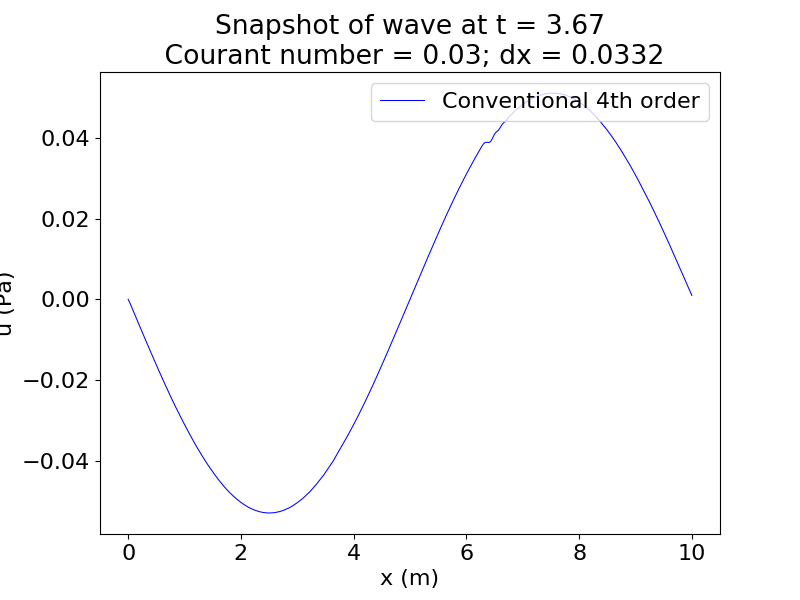

<IPython.core.display.Javascript object>


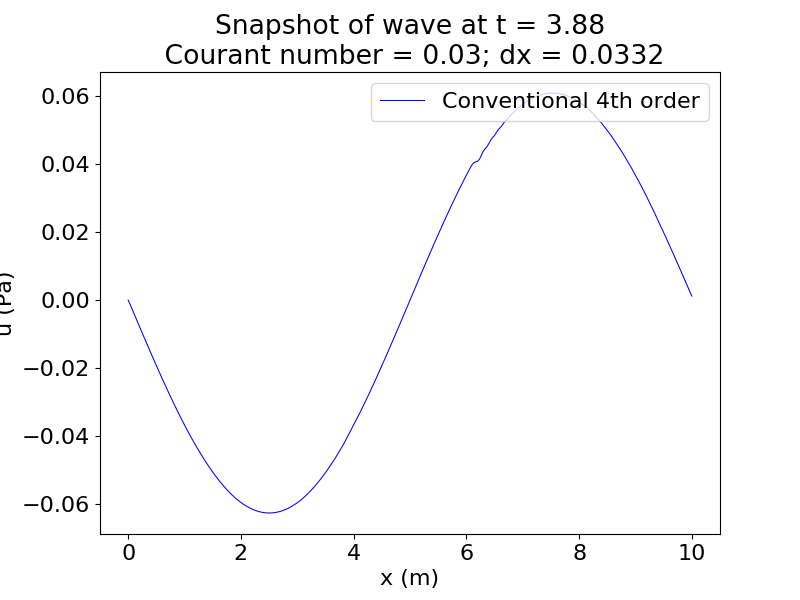

/home/ed/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


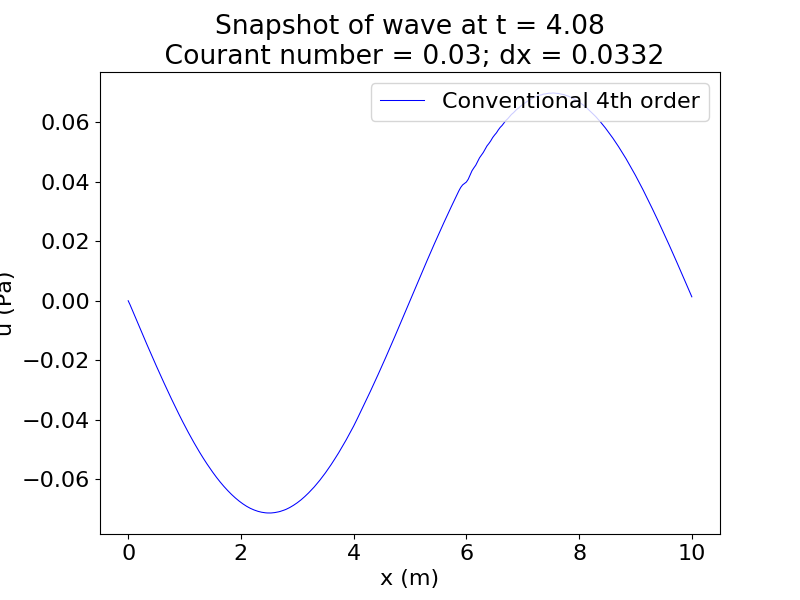

<IPython.core.display.Javascript object>


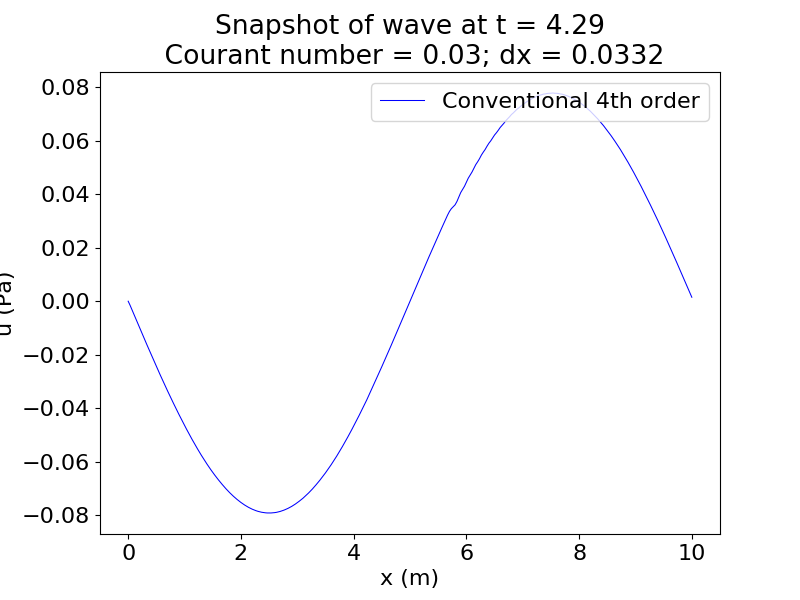

<IPython.core.display.Javascript object>


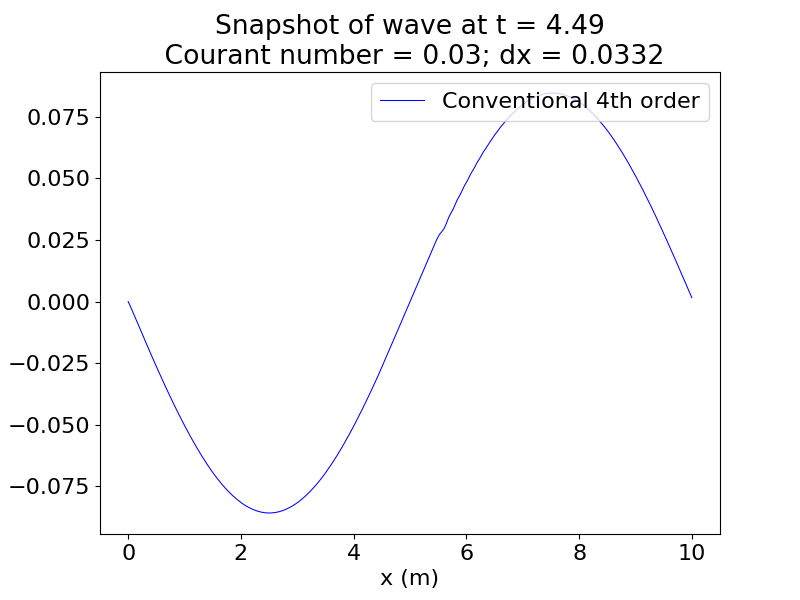

<IPython.core.display.Javascript object>


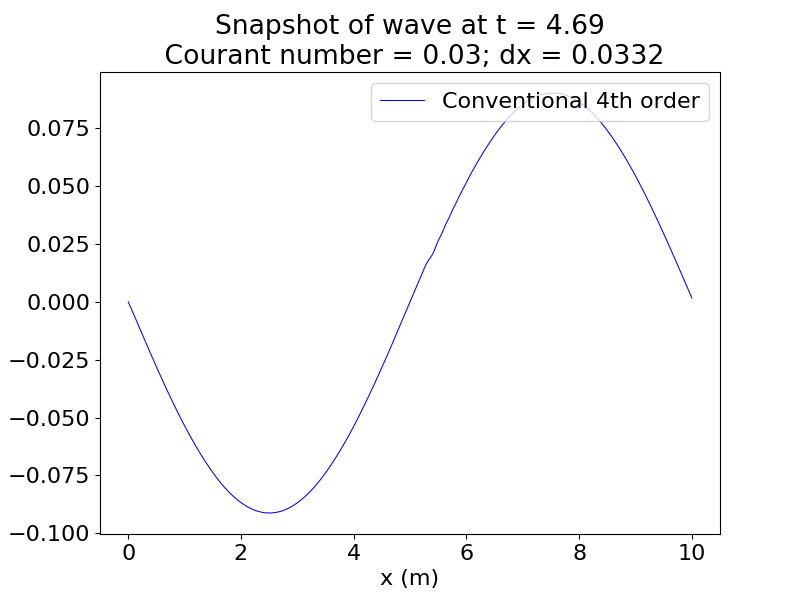

<IPython.core.display.Javascript object>


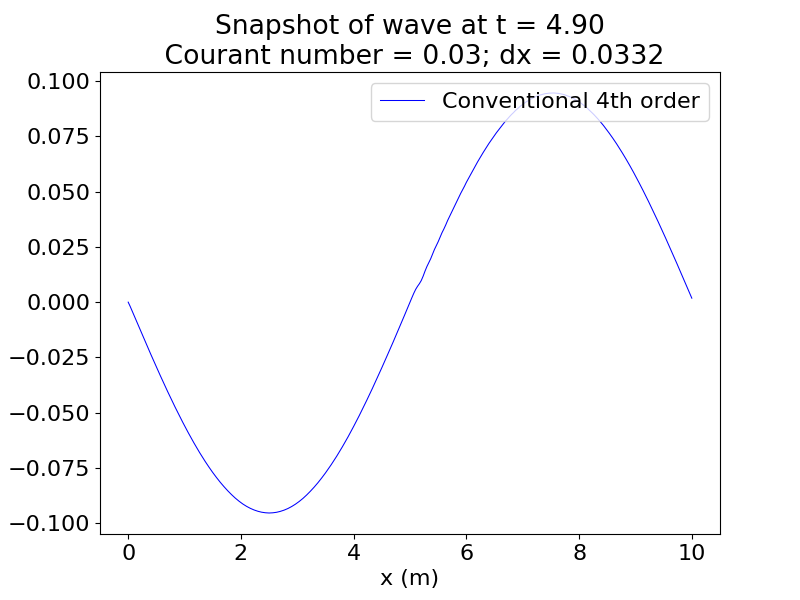

<IPython.core.display.Javascript object>


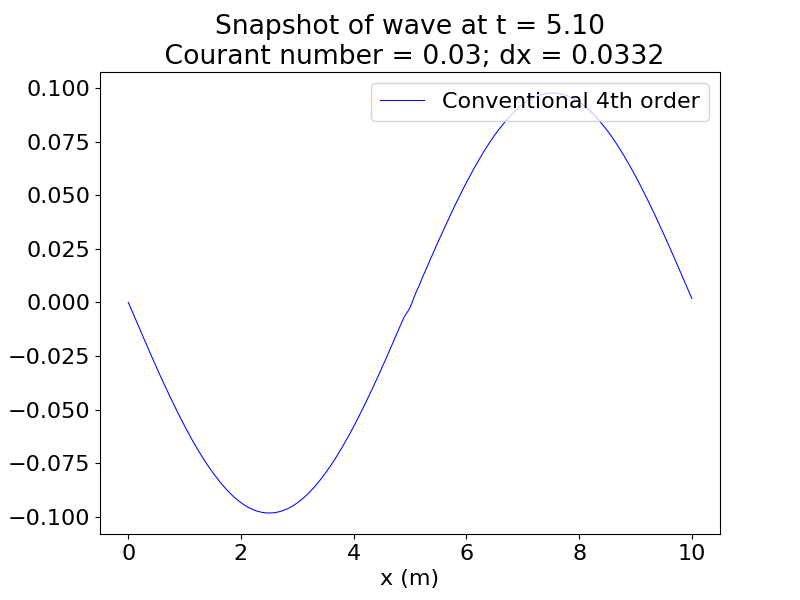

<IPython.core.display.Javascript object>


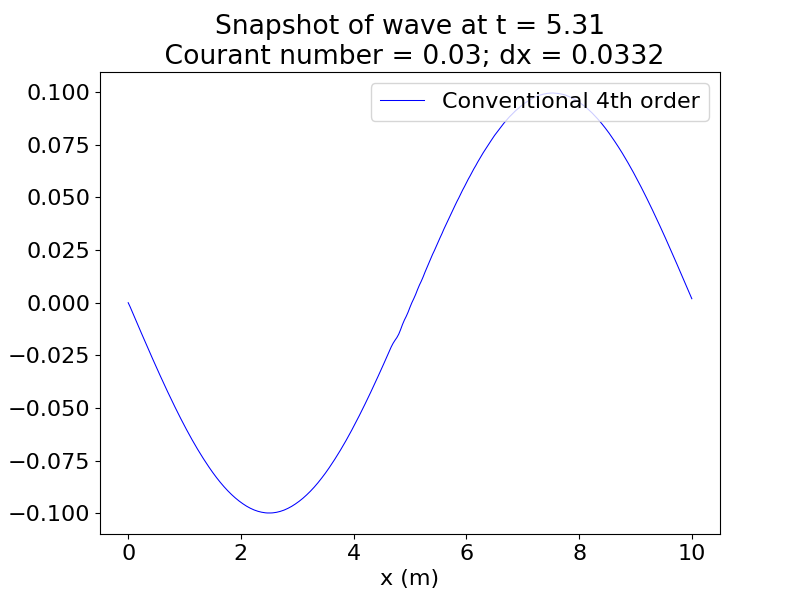

<IPython.core.display.Javascript object>


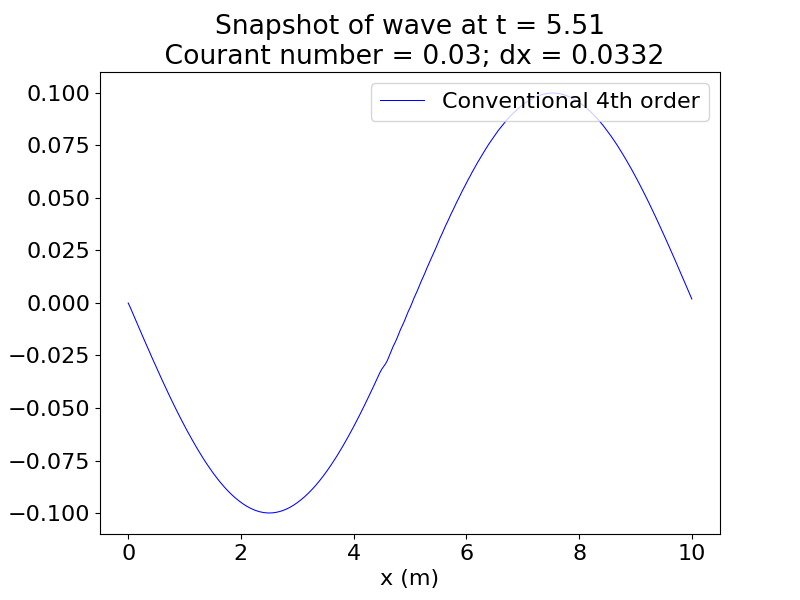

<IPython.core.display.Javascript object>


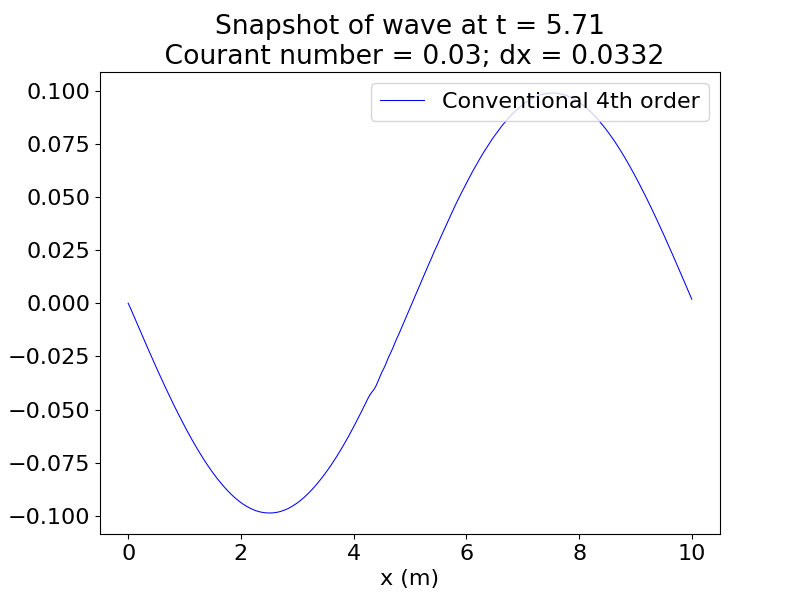

<IPython.core.display.Javascript object>


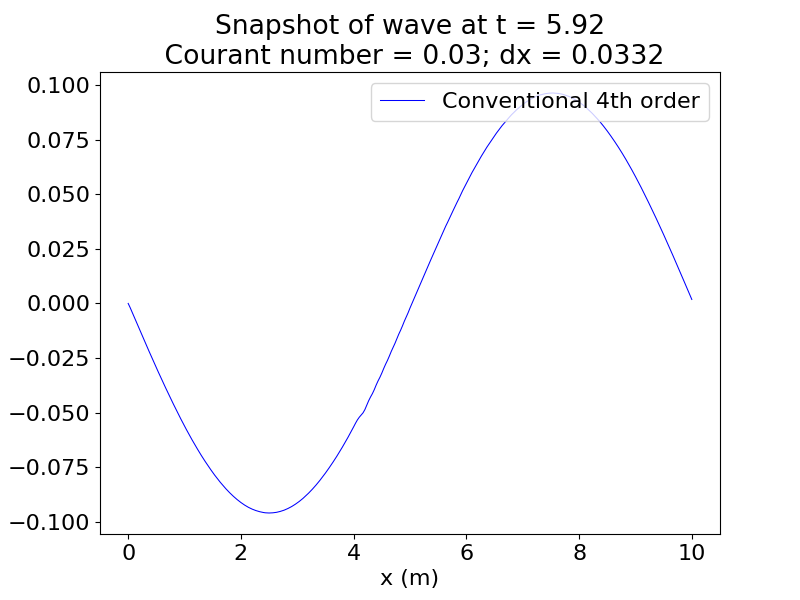

<IPython.core.display.Javascript object>


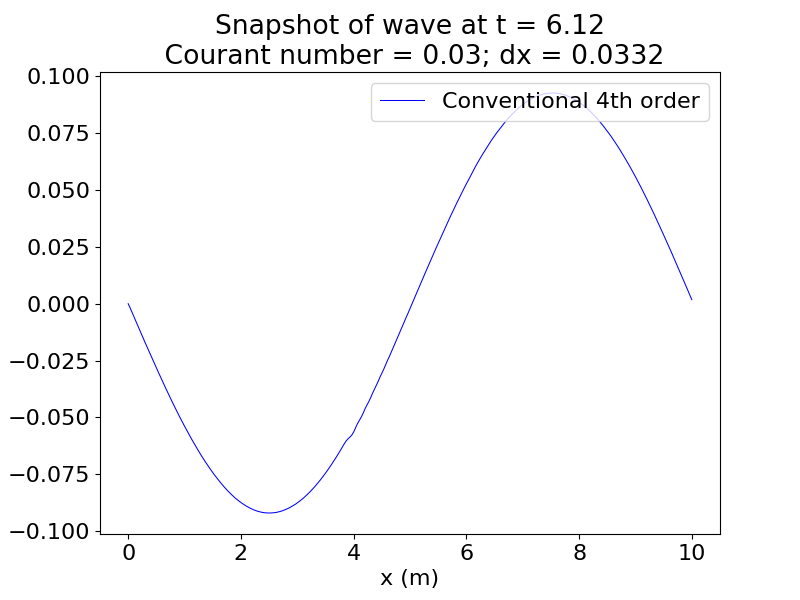

<IPython.core.display.Javascript object>


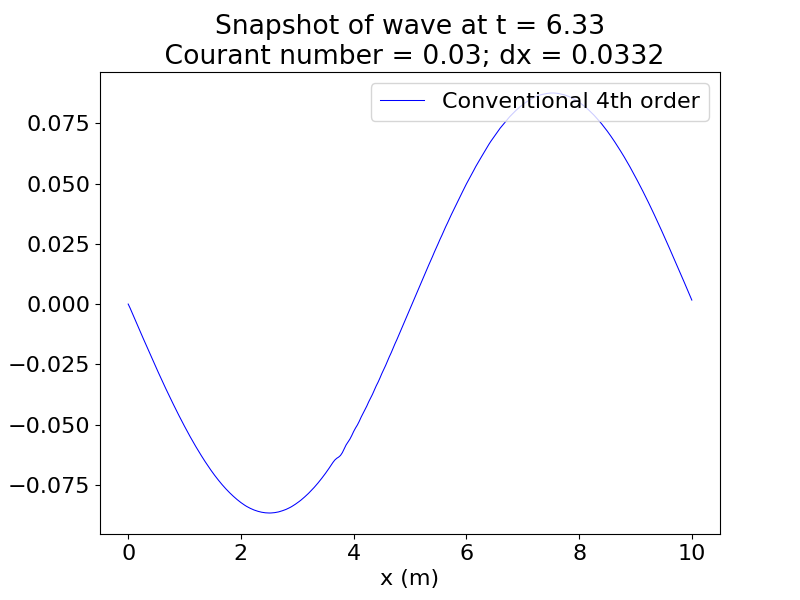

<IPython.core.display.Javascript object>


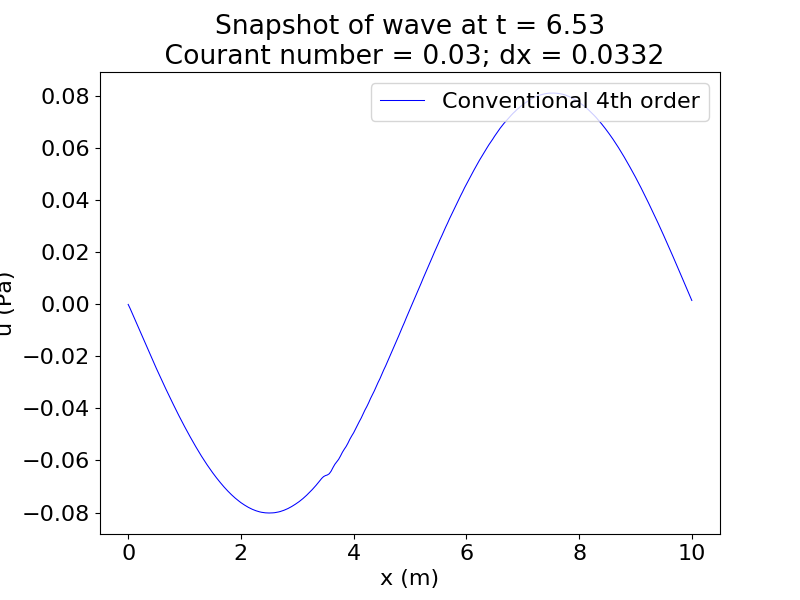

<IPython.core.display.Javascript object>


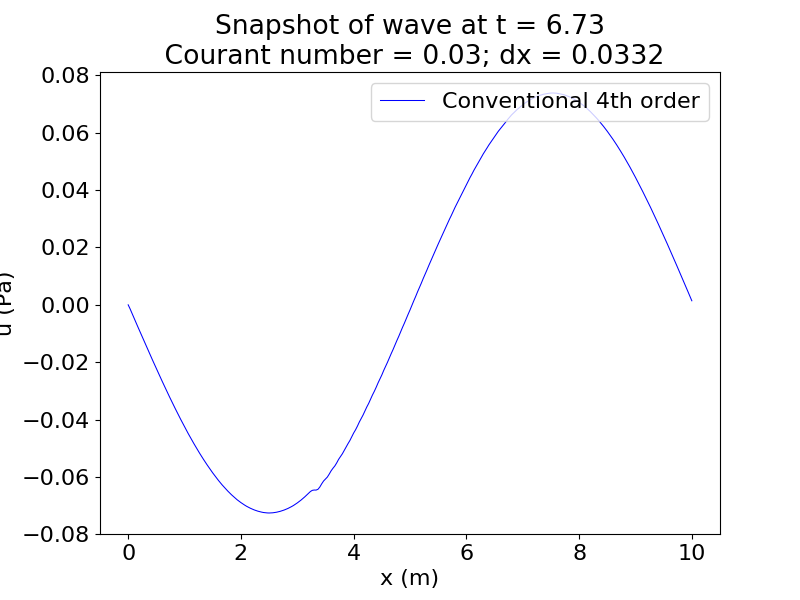

<IPython.core.display.Javascript object>


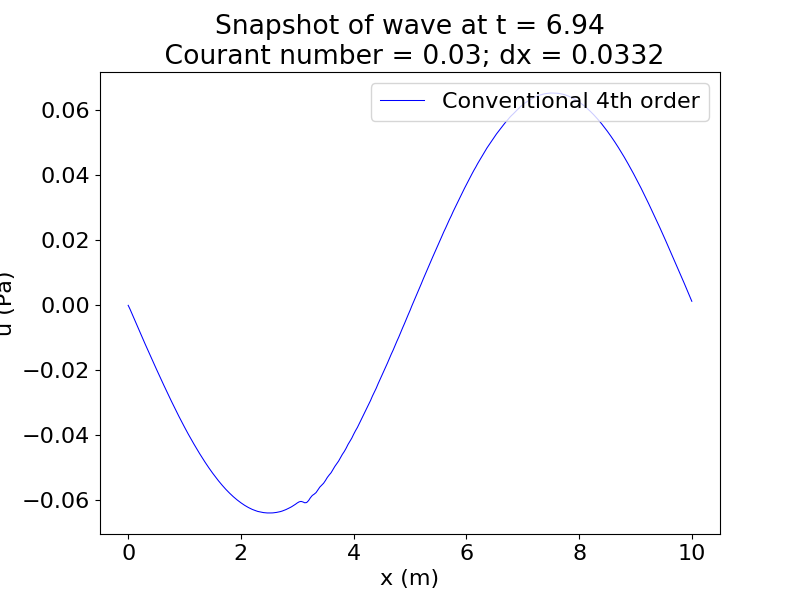

<IPython.core.display.Javascript object>


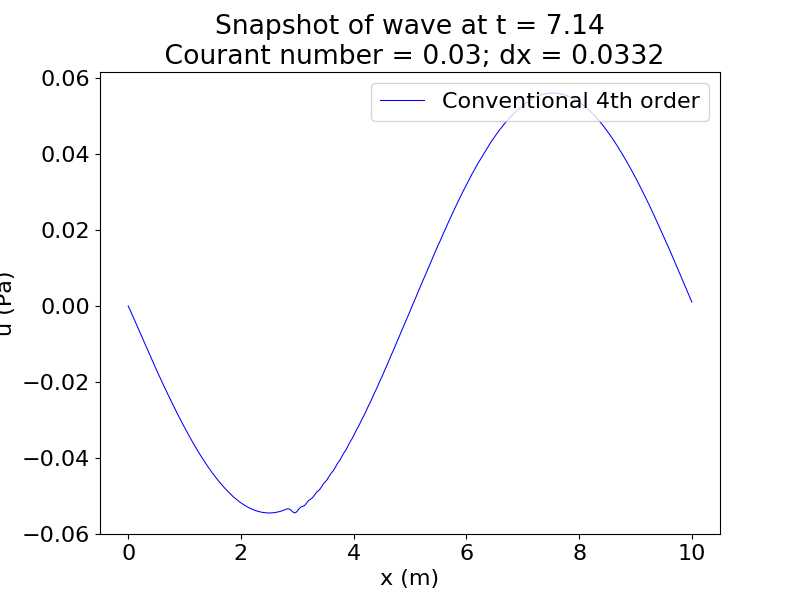

<IPython.core.display.Javascript object>


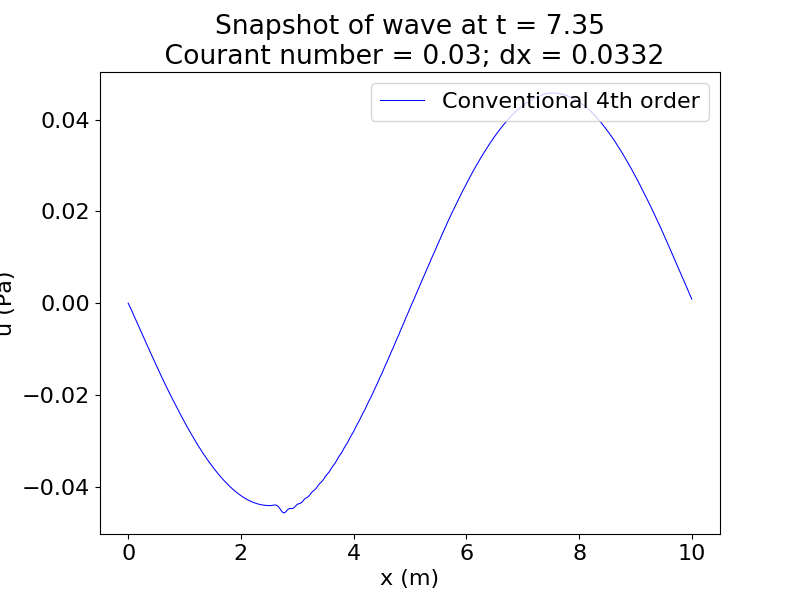

<IPython.core.display.Javascript object>


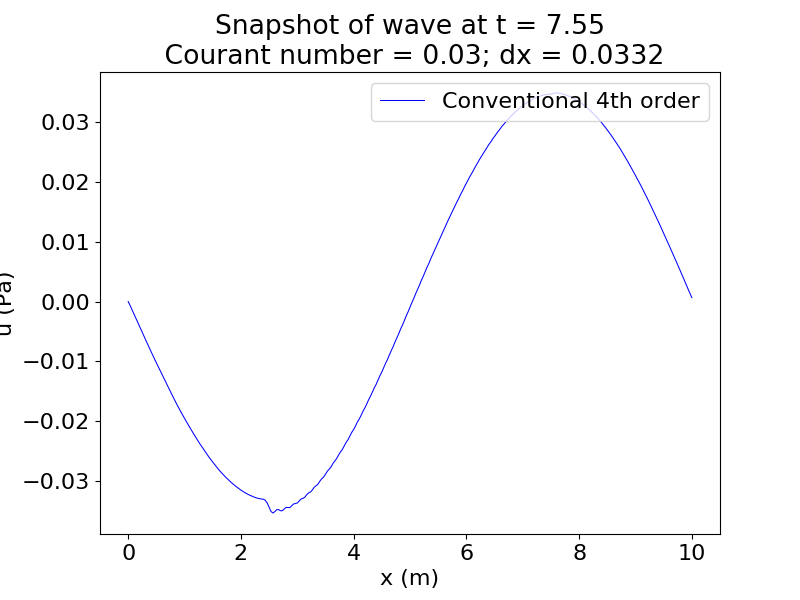

<IPython.core.display.Javascript object>


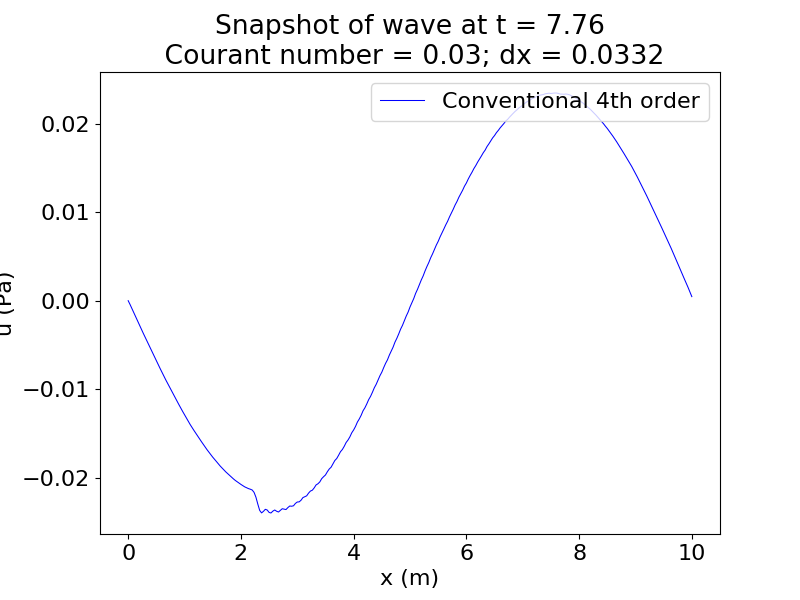

<IPython.core.display.Javascript object>


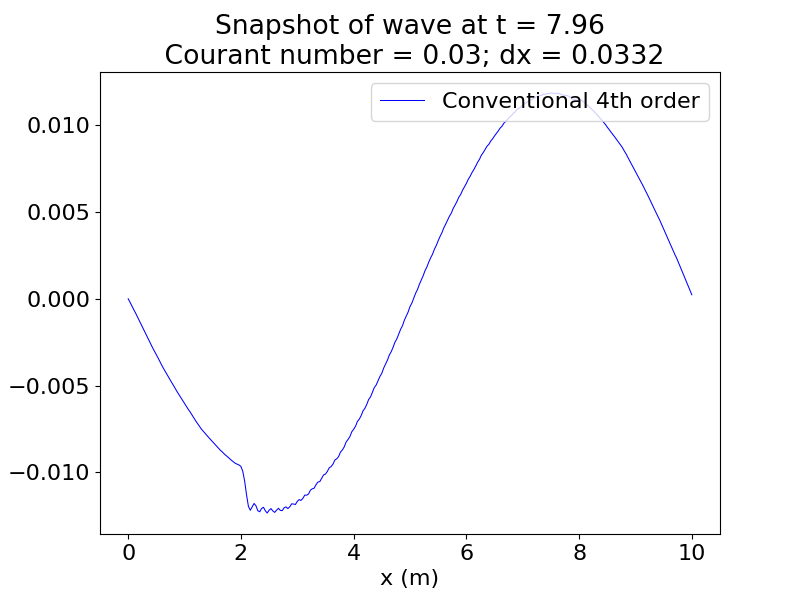

<IPython.core.display.Javascript object>


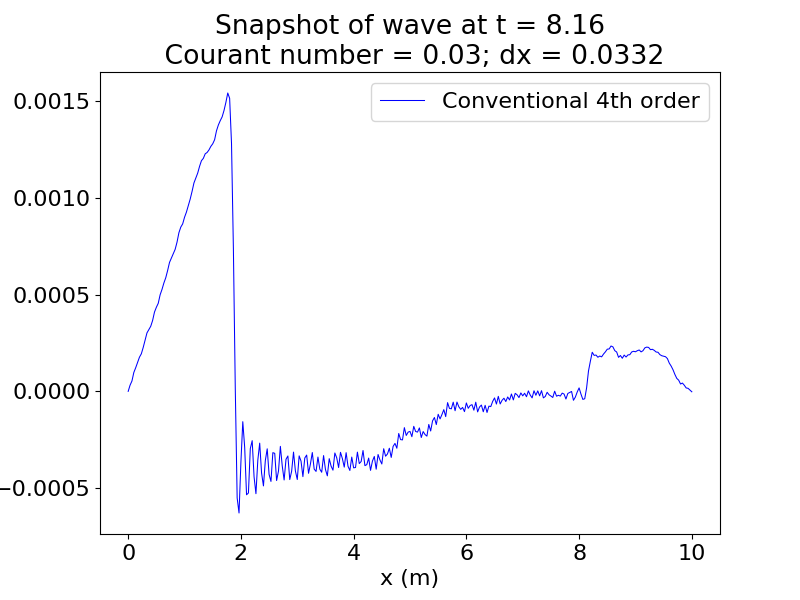

<IPython.core.display.Javascript object>


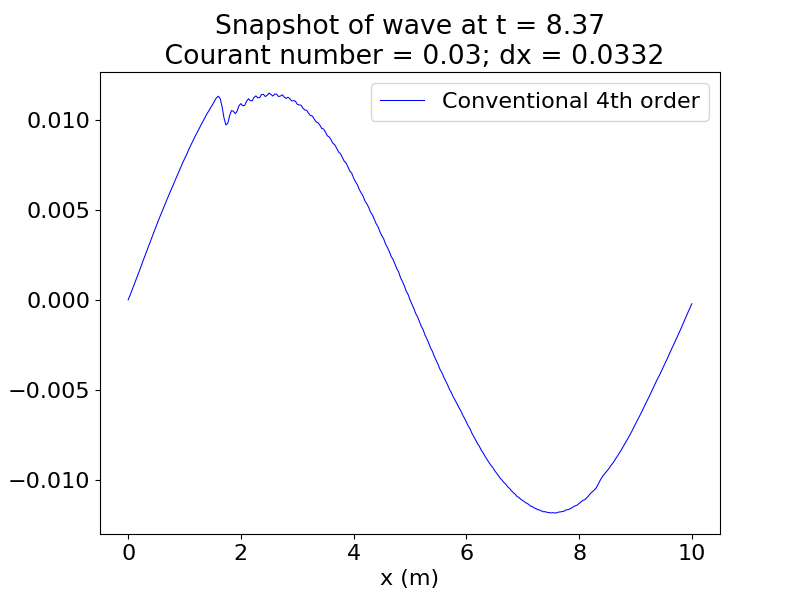

<IPython.core.display.Javascript object>


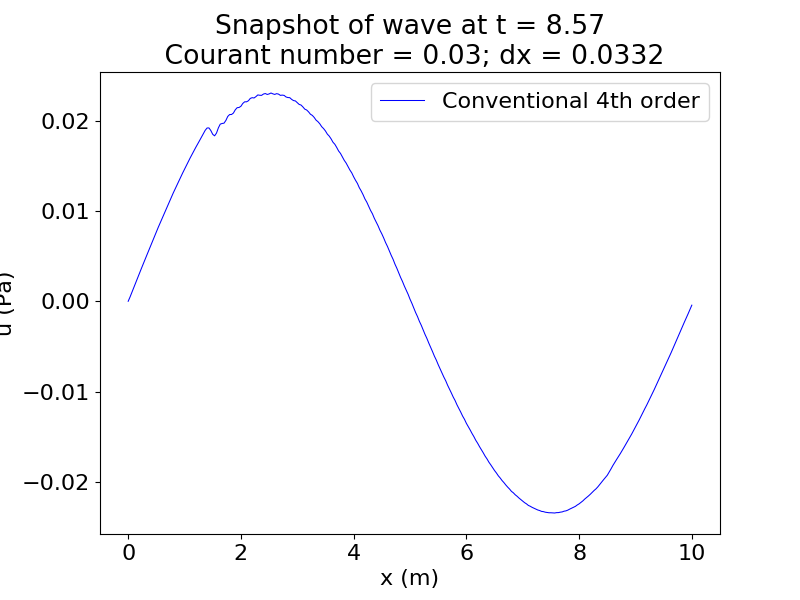

<IPython.core.display.Javascript object>


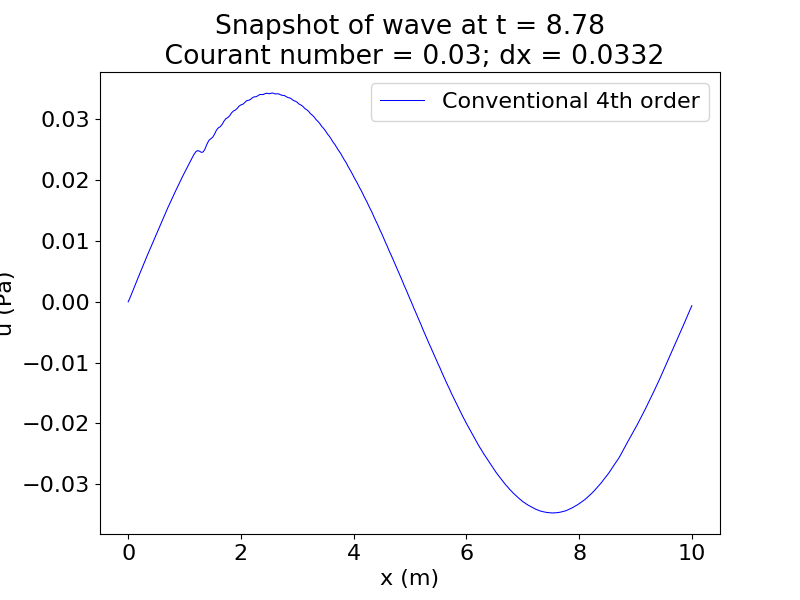

<IPython.core.display.Javascript object>


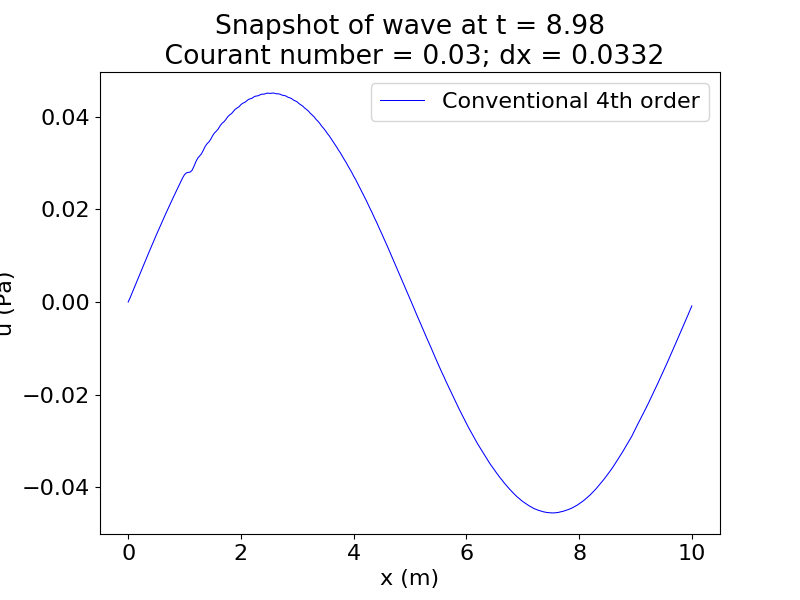

<IPython.core.display.Javascript object>


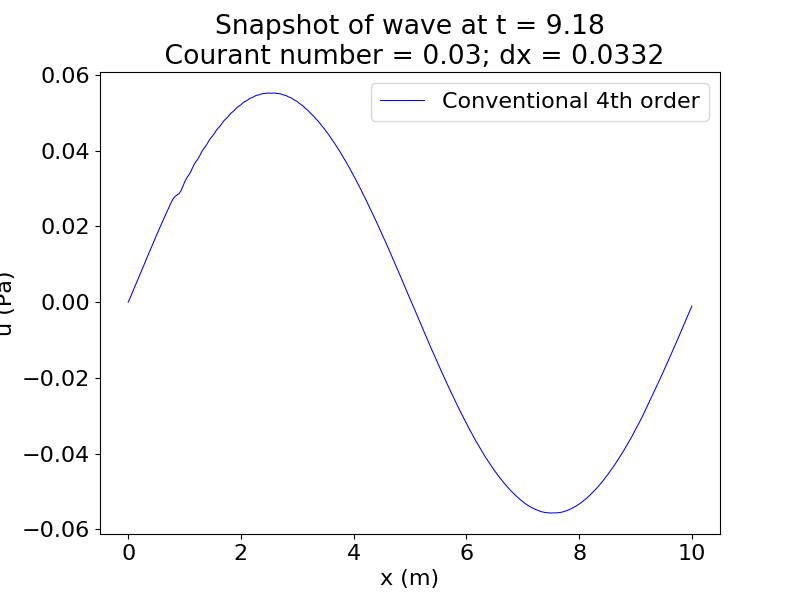

<IPython.core.display.Javascript object>


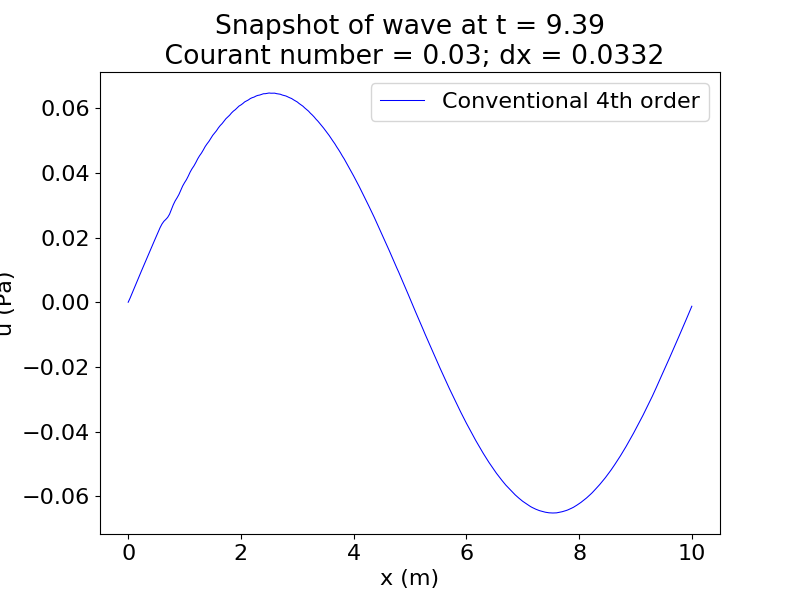

<IPython.core.display.Javascript object>


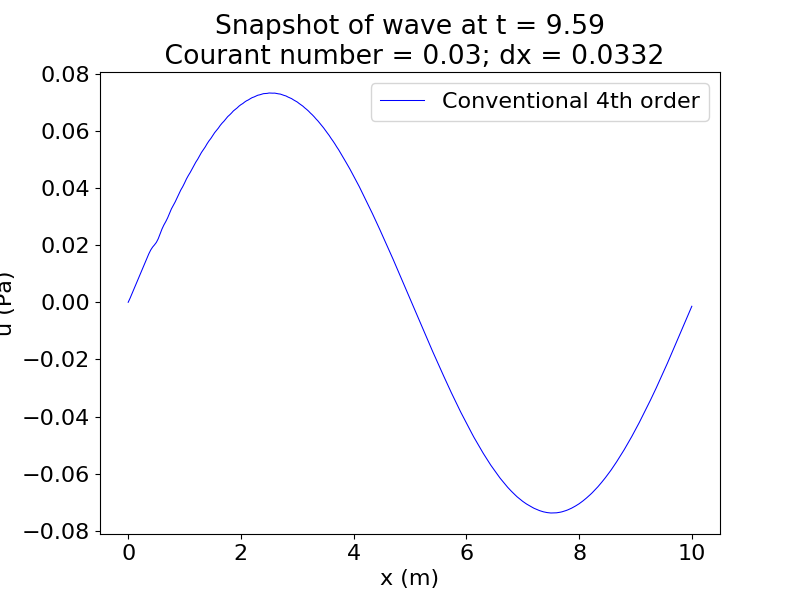

<IPython.core.display.Javascript object>


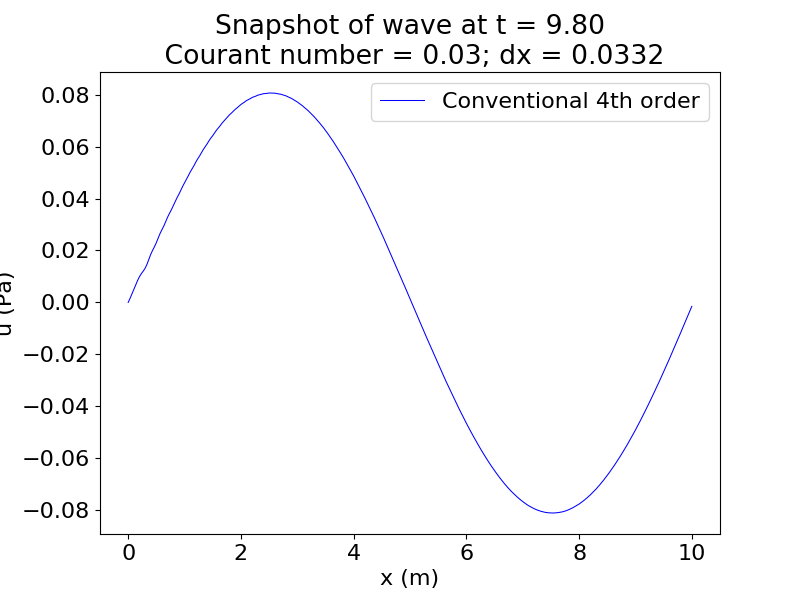

<IPython.core.display.Javascript object>


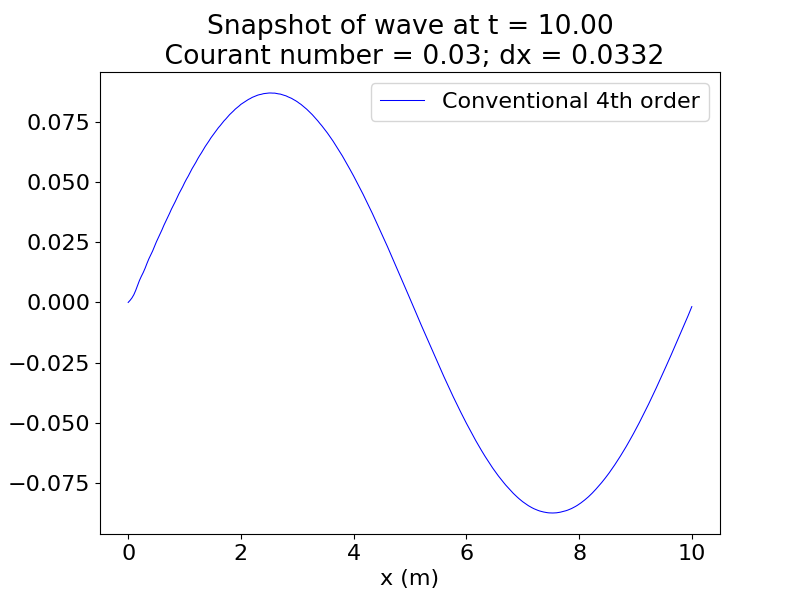

In [8]:
%matplotlib notebook
from numpy import linspace, sin, pi
from devito import SpaceDimension, TimeDimension, Constant, Grid, TimeFunction, Operator, Eq
import matplotlib.pyplot as plt
from sympy import solve

L = 10. # Length of domain
l = 301 # Number of points

x_vals = linspace(0, L, l) # x axis for calling u(x, t) at given t

so = 6 # Space order
to = 2 # Time order

extent = (L,) # Grid is L long with l grid points
shape = (l,)

dt = 1e-3
t_end = L # Standing wave will cycle twice in time L
ns = int(t_end/dt) # Number of timesteps = total time/timestep size

x = SpaceDimension(name='x', spacing=Constant(name='h_x', value=extent[0]/(shape[0]-1)))
t = TimeDimension(name='t', spacing=Constant(name='dt', value=dt))
grid = Grid(extent=extent, shape=shape, dimensions=(x,), time_dimension=t)

u = TimeFunction(name='u', grid=grid, space_order=so, time_order=to, save=ns+1)
stencil = Eq(u.forward, solve(u.dx2 - u.dt2, u.forward)[0])

bc = [Eq(u[t+1,0], 0.0)] # Specify boundary conditions
bc += [Eq(u[t+1,-1], 0.0)]

# Initialize wavefield
u.data[:] = 0.1*sin(2.*pi*x_vals/L)
fig = plt.figure()
plt.title("Initial wavefield")
plt.plot(x_vals, u.data[1])
plt.show()

# Create operator
op = Operator([stencil] + bc)

op.apply(t_M=ns-1)

for i in linspace(0, t_end, t_end*5.):
    if i == 0:
        continue
    fig = plt.figure()
    plt.plot(x_vals, u.data[int(i*u.data.shape[0]/t_end)-1], 'b-', 
            label='Conventional 4th order', linewidth=0.75)
    plt.title("Snapshot of wave at t = %.2f\n Courant number = %.2f; dx = %.4f" % (float(i), dt/(L/(shape[0]-1)), L/l))
    plt.xlabel("x (m)")
    plt.ylabel("u (Pa)")
    plt.legend(loc=1)
    plt.show()